# Data wrangling<a id='Data_wrangling'></a>

## Introduction<a id='Introduction'></a>

This step involves gathering the data, organizing it, and ensuring it is well-defined. Careful attention to these tasks will yield significant benefits later. Some initial data cleaning might be performed at this stage, but it's crucial not to overdo which was previously done during Data Engineering. The secondary objective is to start exploring the data to gain a better understanding of it.

### Recap Of Data Science Problem<a id='Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to develop a model to analyze and predict election results, voter behavior, and trends using the PREP (INE) database. The opposition (PAN-PRI-PRD) suspects it may not be maximizing its potential, given the significant loss in the 2024 elections. Additionally, there is a lack of understanding about which factors most influence voter decisions and drive election outcomes. This project aims to build a predictive model that identifies key factors influencing election results. This model will provide strategic guidance to the opposition for future campaign strategies and resource allocation to enhance their chances in upcoming election cycles.

## Objectives<a id='Objectives'></a>

This project aims to develop a model using the PREP (INE) database to analyze and predict election results, voter behavior, and trends, to understand why the winning party achieved such a significant victory with 60% of the overall population's acceptance, while the opposition (PAN-PRI-PRD) lost dramatically, securing only 29% of the votes.
The main objective is to provide actionable insights to support the opposition party (PAN-PRI-PRD) that lost the 2024 elections. The model will help identify key factors influencing election outcomes, enabling the opposition to develop a strategy that can turn around the results before the next elections in 2030.


## Imports<a id='Imports'></a>

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Load The DataFrame <a id='Load_The_DataFrame'></a>

In [199]:
# the supplied CSV data file is the raw_data with Elections Results, in parallel with Social, Economic and Demographic features.
df= pd.read_csv('ELECTIONS_vs_SOCIODEMOGRAPHICS_ALT2.csv')

Good first steps in auditing the data are the info method, shape method and displaying the first few records with head.

In [200]:
df.shape

(32, 37)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ENTIDAD                        32 non-null     object 
 1   COMPETITOR_Votes_2024          32 non-null     int64  
 2   Xochitl_Opposition_Votes       32 non-null     int64  
 3   Maynez_Independant_Votes       32 non-null     int64  
 4   Null_Votes                     32 non-null     int64  
 5   Urban_Polling_Stations         32 non-null     int64  
 6   Non_Urban_Polling_Stations     32 non-null     int64  
 7   AMLO_2018                      32 non-null     int64  
 8   GDP_1982                       32 non-null     int64  
 9   GDP_1988                       32 non-null     int64  
 10  GDP_1994                       32 non-null     int64  
 11  GDP_2000                       32 non-null     int64  
 12  GDP_2006                       32 non-null     int64

Lets review if there is a patter for the missing values

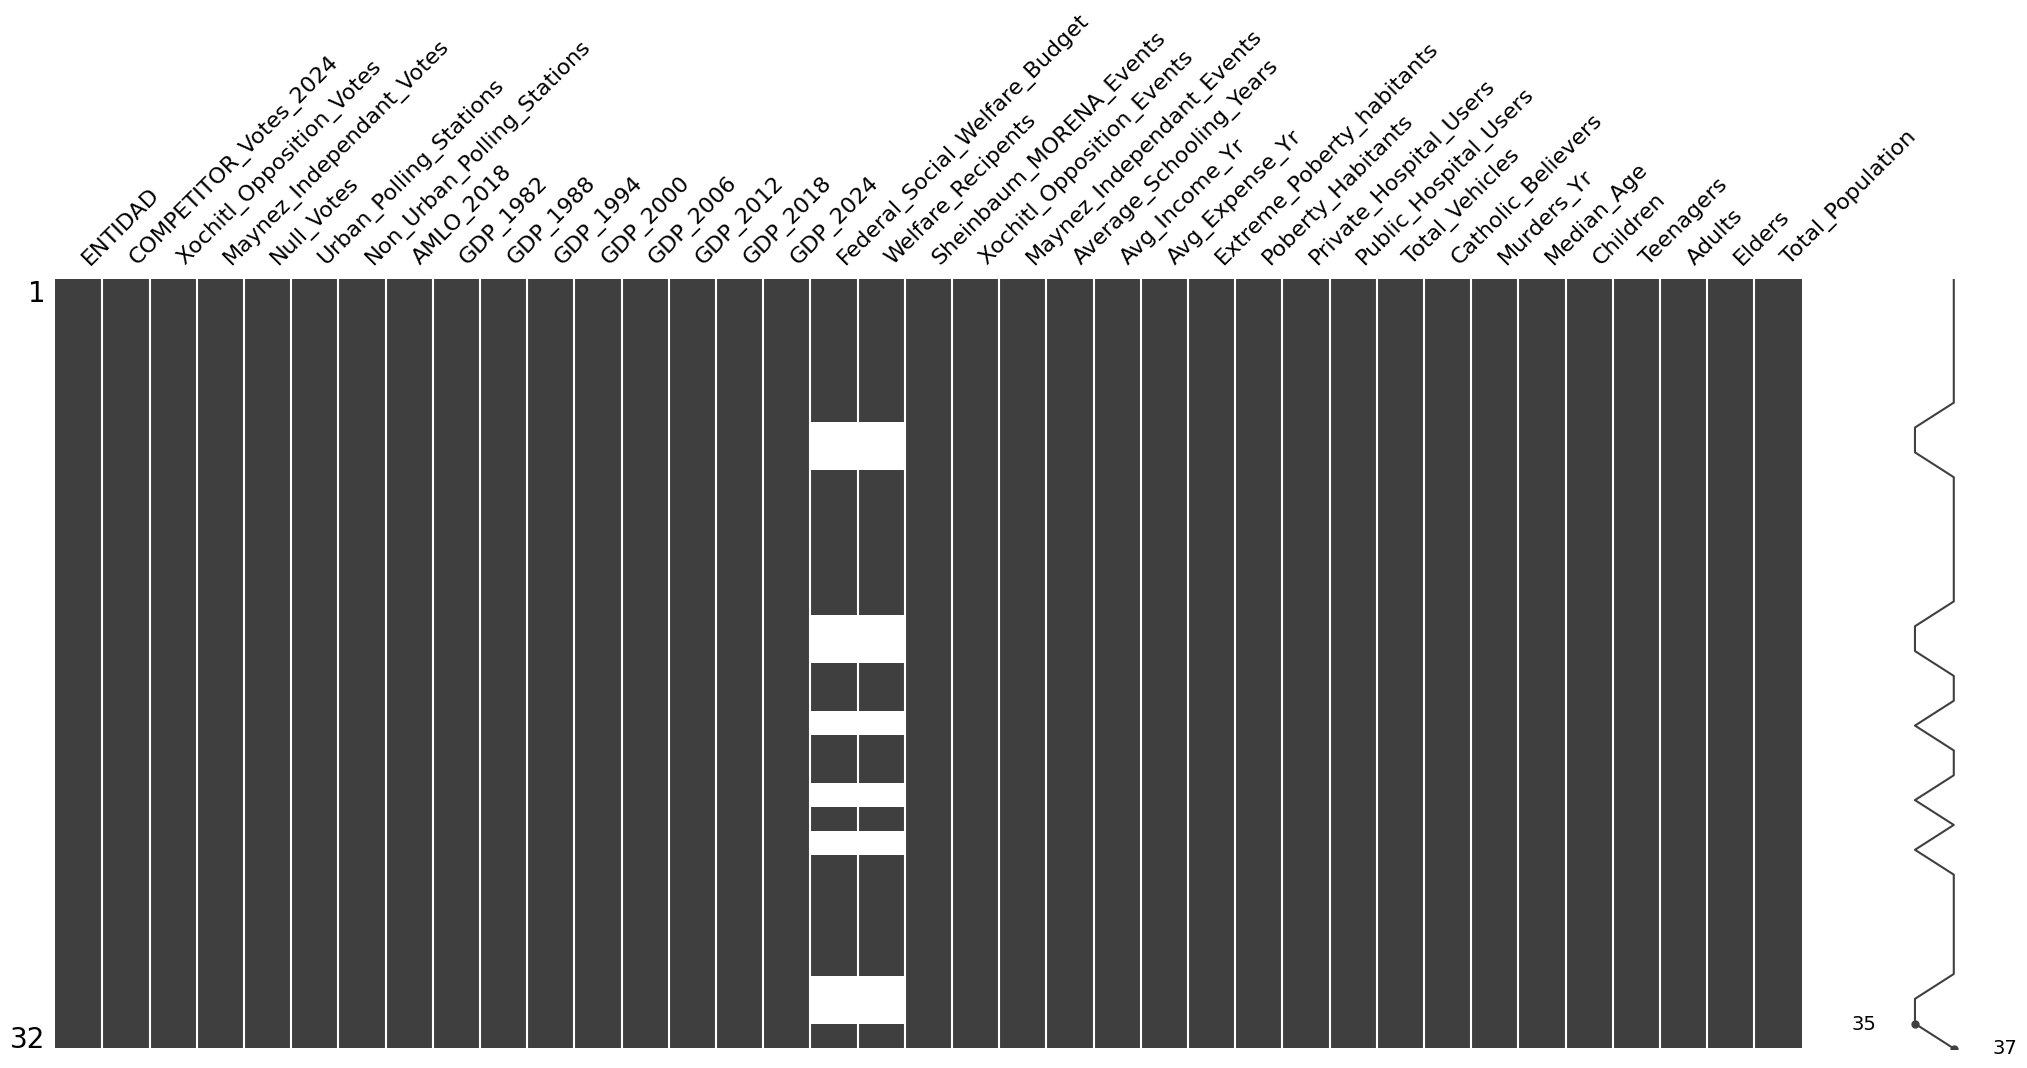

In [202]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()

Only Federal Social Welfare and Welfare Recipents had null values and in the exact same rows. After a careful sanity check I realize that the null values were caused due to incompatibility of formats in the foreign keys of my left join (left table used Apostrophe while right table didn't). I will fix the error below:

In [203]:
#Read the correct columns
correction_path = 'Federal_Welfare_CORRECTED.csv'
df_correction = pd.read_csv(correction_path, encoding='latin1')
df_correction.head(32)

,ï»¿WRONG ENTIDAD,ENTIDAD,Federal_Social_Welfare_Budget_2024,Welfare_Recipents
0,AGUASCALIENTES,AGUASCALIENTES,495079,51394
1,BAJA CALIFORNIA,BAJA CALIFORNIA,604660,61194
2,BAJA CALIFORNIA SUR,BAJA CALIFORNIA SUR,472056,46686
3,CAMPECHE,CAMPECHE,536081,55722
4,COAHUILA DE ZARAGOZA,COAHUILA,826240,83773
5,COLIMA,COLIMA,386882,38358
6,CHIAPAS,CHIAPAS,2551158,276864
7,CHIHUAHUA,CHIHUAHUA,1235326,132323
8,CIUDAD DE MÃXICO,CIUDAD DE MEXICO,9277541,924361
9,DURANGO,DURANGO,1509159,158018


In [204]:
# Drop the wrong columns in my original dataframe
df= df.drop(columns=['Federal_Social_Welfare_Budget', 'Welfare_Recipents'])
df.isnull().sum()

ENTIDAD                       0
COMPETITOR_Votes_2024         0
Xochitl_Opposition_Votes      0
Maynez_Independant_Votes      0
Null_Votes                    0
Urban_Polling_Stations        0
Non_Urban_Polling_Stations    0
AMLO_2018                     0
GDP_1982                      0
GDP_1988                      0
GDP_1994                      0
GDP_2000                      0
GDP_2006                      0
GDP_2012                      0
GDP_2018                      0
GDP_2024                      0
Sheinbaum_MORENA_Events       0
Xochitl_Opposition_Events     0
Maynez_Independant_Events     0
Average_Schooling_Years       0
Avg_Income_Yr                 0
Avg_Expense_Yr                0
Extreme_Poberty_habitants     0
Poberty_Habitants             0
Private_Hospital_Users        0
Public_Hospital_Users         0
Total_Vehicles                0
Catholic_Believers            0
Murders_Yr                    0
Median_Age                    0
Children                      0
Teenager

Now that I pulled the corrected columns, and eliminated the wrong columns of my main Dataframe (df), I will left-join the correction in my main Dataframe (df)

In [205]:
# Filter only the corrected columns of the small dataframe to be joined in the main df.
df_correction = df_correction[['ENTIDAD','Federal_Social_Welfare_Budget_2024', 'Welfare_Recipents']]

In [206]:
# Left JOIN
df = pd.merge(df, df_correction, on='ENTIDAD', how='left')
df.head()

,ENTIDAD,COMPETITOR_Votes_2024,Xochitl_Opposition_Votes,Maynez_Independant_Votes,Null_Votes,Urban_Polling_Stations,Non_Urban_Polling_Stations,AMLO_2018,GDP_1982,GDP_1988,...,Catholic_Believers,Murders_Yr,Median_Age,Children,Teenagers,Adults,Elders,Total_Population,Federal_Social_Welfare_Budget_2024,Welfare_Recipents
0,AGUASCALIENTES,270389,294746,57054,14144,1279,563,190820,83133,86482,...,1159832,88,27,256986,261684,761561,145376,1425607,495079,51394
1,BAJA CALIFORNIA,862661,290698,132914,30287,4671,703,675810,446781,417816,...,2187369,2925,30,574174,627987,2187557,379302,3769020,604660,61194
2,BAJA CALIFORNIA SUR,175755,90838,26581,6443,827,287,136806,58188,62347,...,544008,90,29,133230,133134,456475,75608,798447,472056,46686
3,CAMPECHE,240693,62268,82898,9346,734,496,171328,559722,588026,...,515526,110,29,165244,156308,504195,102616,928363,536081,55722
4,CHIAPAS,1519559,355592,162166,94634,2519,4354,1106665,213802,230322,...,2704411,503,24,1053437,1259351,5405537,1491619,9209944,2551158,276864


In [207]:
df.isnull().sum()

ENTIDAD                               0
COMPETITOR_Votes_2024                 0
Xochitl_Opposition_Votes              0
Maynez_Independant_Votes              0
Null_Votes                            0
Urban_Polling_Stations                0
Non_Urban_Polling_Stations            0
AMLO_2018                             0
GDP_1982                              0
GDP_1988                              0
GDP_1994                              0
GDP_2000                              0
GDP_2006                              0
GDP_2012                              0
GDP_2018                              0
GDP_2024                              0
Sheinbaum_MORENA_Events               0
Xochitl_Opposition_Events             0
Maynez_Independant_Events             0
Average_Schooling_Years               0
Avg_Income_Yr                         0
Avg_Expense_Yr                        0
Extreme_Poberty_habitants             0
Poberty_Habitants                     0
Private_Hospital_Users                0


In [208]:
df.tail()

,ENTIDAD,COMPETITOR_Votes_2024,Xochitl_Opposition_Votes,Maynez_Independant_Votes,Null_Votes,Urban_Polling_Stations,Non_Urban_Polling_Stations,AMLO_2018,GDP_1982,GDP_1988,...,Catholic_Believers,Murders_Yr,Median_Age,Children,Teenagers,Adults,Elders,Total_Population,Federal_Social_Welfare_Budget_2024,Welfare_Recipents
27,TAMAULIPAS,910332,390288,139605,31906,3795,1157,607278,331231,336905,...,2223753,482,30,571338,600803,1929367,426227,3527735,946950,89313
28,TLAXCALA,486946,106484,98955,15194,1283,438,358631,68238,69999,...,1045600,155,28,249123,240925,707043,145886,1342977,1222596,127898
29,VERACRUZ,2300252,810805,281570,84198,5796,5189,1780983,646101,676136,...,5615966,787,31,1278905,1367016,4258766,1157892,8062579,2540337,253349
30,YUCATAN,696450,365357,81057,23358,2195,769,330914,140424,145505,...,1597707,55,30,365924,385500,1280439,289035,2320898,819399,89747
31,ZACATECAS,369235,223133,124548,20082,1112,1522,307197,81827,89469,...,1356905,1459,28,309307,292563,820489,199779,1622138,1574047,169039


Now that there are no empty values, let's check the correct classification of data types.

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ENTIDAD                             32 non-null     object
 1   COMPETITOR_Votes_2024               32 non-null     int64 
 2   Xochitl_Opposition_Votes            32 non-null     int64 
 3   Maynez_Independant_Votes            32 non-null     int64 
 4   Null_Votes                          32 non-null     int64 
 5   Urban_Polling_Stations              32 non-null     int64 
 6   Non_Urban_Polling_Stations          32 non-null     int64 
 7   AMLO_2018                           32 non-null     int64 
 8   GDP_1982                            32 non-null     int64 
 9   GDP_1988                            32 non-null     int64 
 10  GDP_1994                            32 non-null     int64 
 11  GDP_2000                            32 non-null     int64 
 

PERFECT! All variables are numeric except for entity

## Explore The Data<a id='Explore_The_Data'></a>

### Find One State Of Interest<a id='Find_One_State_Of_Interest'></a>

During Data Engineering I noticed that Opposition Party only won elections in Aguascalientes Entity, let's take a look at this particular state 

In [210]:
Aguascalientes= df[df.ENTIDAD == 'AGUASCALIENTES']
Aguascalientes.T

,0
ENTIDAD,AGUASCALIENTES
COMPETITOR_Votes_2024,270389
Xochitl_Opposition_Votes,294746
Maynez_Independant_Votes,57054
Null_Votes,14144
Urban_Polling_Stations,1279
Non_Urban_Polling_Stations,563
AMLO_2018,190820
GDP_1982,83133
GDP_1988,86482


I don't see a specific, but Let's compare Aguascalienets Demographics with Mexico to see if we find something else

In [211]:
Mexico_Demographics_path = 'NATION_Demographics.csv'
df_Mexico_Demographics = pd.read_csv(Mexico_Demographics_path, encoding='latin1')
MX= df_Mexico_Demographics
df_Mexico_Demographics.T

,0
ENTIDAD,NATION
Average_Schooling_Years,9.74
Avg_Income_Yr,"254,780.00"
Avg_Expense_Yr,"159,860.00"
Extreme_Poberty_habitants,9103500
Poberty_Habitants,37701000
Private_Hospital_Users,3764755
Public_Hospital_Users,90446414
Total_Vehicles,"55,167,421"
Catholic_Believers,"90,224,559"


In [212]:
MX.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['ENTIDAD', 'Average_Schooling_Years', 'Avg_Income_Yr', 'Avg_Expense_Yr',
       'Extreme_Poberty_habitants', 'Poberty_Habitants',
       'Private_Hospital_Users', 'Public_Hospital_Users', 'Total_Vehicles',
       'Catholic_Believers', 'Murders_Yr', 'Median_Age', 'Children',
       'Teenagers', 'Adults', 'Elders', 'Total_Population'],
      dtype='object')>

In [213]:
comparisson= ['ENTIDAD', 'Average_Schooling_Years', 'Avg_Income_Yr', 'Avg_Expense_Yr',
       'Extreme_Poberty_habitants', 'Poberty_Habitants',
       'Private_Hospital_Users', 'Public_Hospital_Users', 'Total_Vehicles',
       'Catholic_Believers', 'Murders_Yr', 'Median_Age', 'Children',
       'Teenagers', 'Adults', 'Elders', 'Total_Population']

In [214]:
Comparisson= Aguascalientes[comparisson].T
Comparisson['1']= MX.T
Comparisson

,0,1
ENTIDAD,AGUASCALIENTES,NATION
Average_Schooling_Years,10,9.74
Avg_Income_Yr,313152,"254,780.00"
Avg_Expense_Yr,181260,"159,860.00"
Extreme_Poberty_habitants,26,9103500
Poberty_Habitants,326,37701000
Private_Hospital_Users,34968,3764755
Public_Hospital_Users,1153954,90446414
Total_Vehicles,721372,"55,167,421"
Catholic_Believers,1159832,"90,224,559"


As a first Glance it seems that this Entity has a higher Average Income and Schooling Years than Mexico Country. As well as a very low Murder/Yr amount compared to Mexico. Median Age Avg is also below MX Country Average

#### Unique Values <a id='Unique_Values'></a>

In [215]:
df['ENTIDAD'].value_counts().head(32)

ENTIDAD
AGUASCALIENTES         1
BAJA CALIFORNIA        1
YUCATAN                1
VERACRUZ               1
TLAXCALA               1
TAMAULIPAS             1
TABASCO                1
SONORA                 1
SINALOA                1
SAN LUIS POTOSI        1
QUINTANA ROO           1
QUERETARO              1
PUEBLA                 1
OAXACA                 1
NUEVO LEON             1
NAYARIT                1
MORELOS                1
MICHOACAN              1
MEXICO                 1
JALISCO                1
HIDALGO                1
GUERRERO               1
GUANAJUATO             1
DURANGO                1
COLIMA                 1
COAHUILA               1
CIUDAD DE MEXICO       1
CHIHUAHUA              1
CHIAPAS                1
CAMPECHE               1
BAJA CALIFORNIA SUR    1
ZACATECAS              1
Name: count, dtype: int64

In [216]:
#USE the `nunique` method to calculate the number of unique values in each Entity
df[["ENTIDAD"]].nunique()

ENTIDAD    32
dtype: int64

OK! No Duplicated Values!


Let's Now plot total Population per State

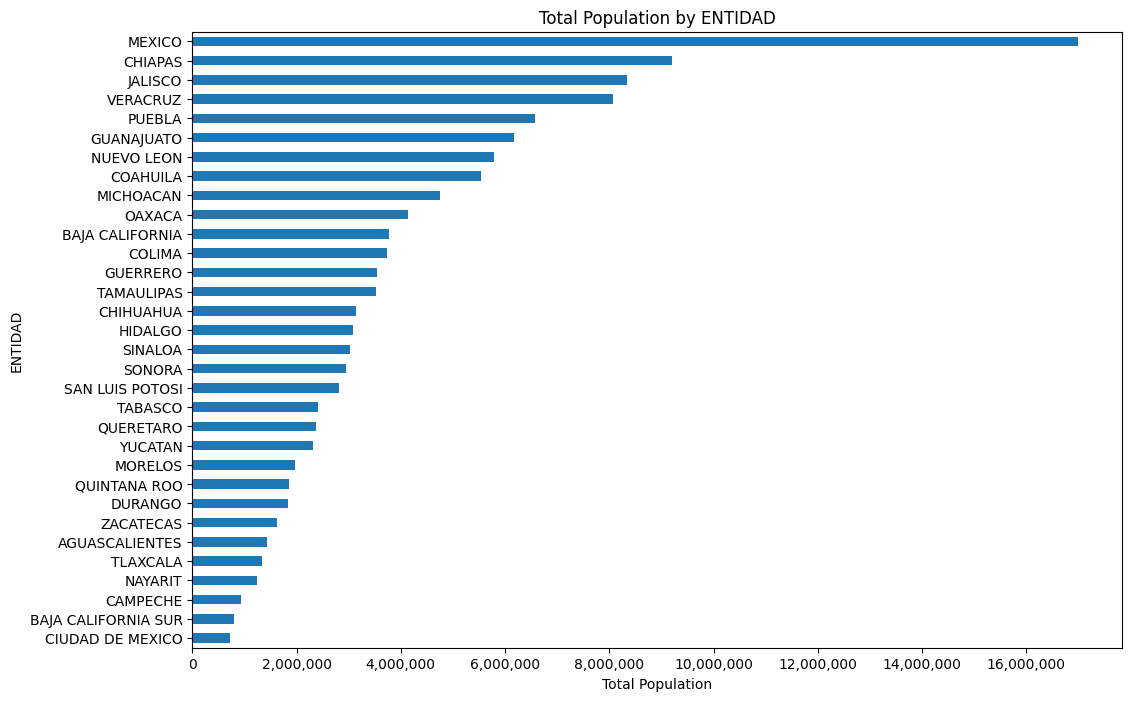

In [217]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por la columna 'Total_Population' de mayor a menor
df_sorted = df.sort_values(by='Total_Population', ascending=True)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 8))

# Especificar una gráfica de barras horizontales ('barh')
df_sorted.plot(kind='barh', y='Total_Population', x='ENTIDAD', ax=ax, legend=False)

# Darle un título útil a la gráfica
ax.set_title('Total Population by ENTIDAD')

# Etiquetar el eje x
ax.set_xlabel("Total Population")

# Formatear los números del eje x para que no utilicen notación científica
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Mostrar la gráfica
plt.show()


We can see that Mexico Entity is highly populated 16 Million People, followed by Chiapas Entity (9.6 Million people)

## Votes Per Candidate <a id='Votes_Per_Candidate'></a>

Now Lets graph the votes per Entity and Per Political Partie

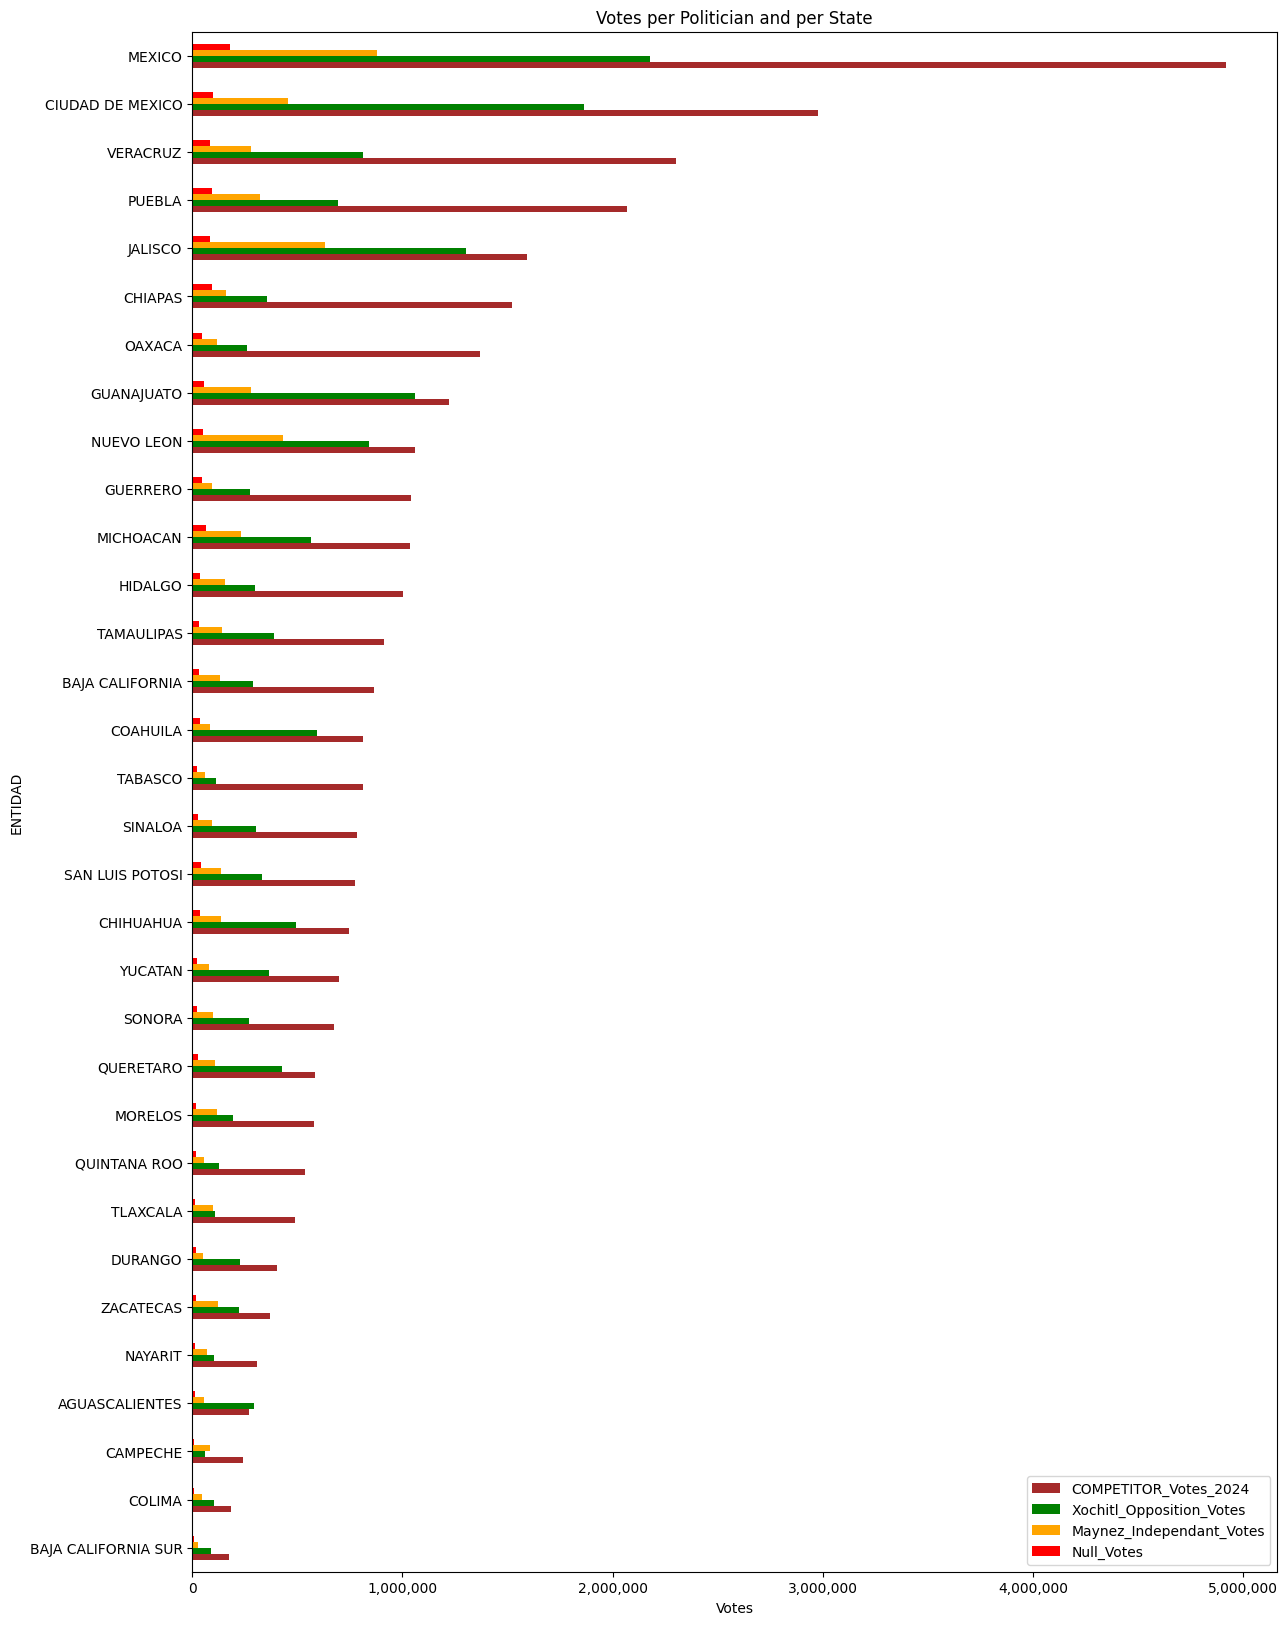

In [218]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'COMPETITOR_Votes_2024' column in ascending order
df_sorted = df.sort_values(by='COMPETITOR_Votes_2024', ascending=True)

# Create the horizontal bar plot with specific colors and thicker bars
fig, ax = plt.subplots(figsize=(14, 20))

# Group the bars by entity and assign colors
df_sorted.set_index("ENTIDAD")[["COMPETITOR_Votes_2024", "Xochitl_Opposition_Votes", "Maynez_Independant_Votes", "Null_Votes"]].plot(
    kind='barh',
    ax=ax,
    color=['brown', 'green', 'orange', 'red'],
    linewidth=2
)

# Give the plot a useful title
ax.set_title('Votes per Politician and per State')

# Label the x-axis
ax.set_xlabel("Votes")

# Format the x-axis numbers to avoid scientific notation
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show the plot
plt.show()


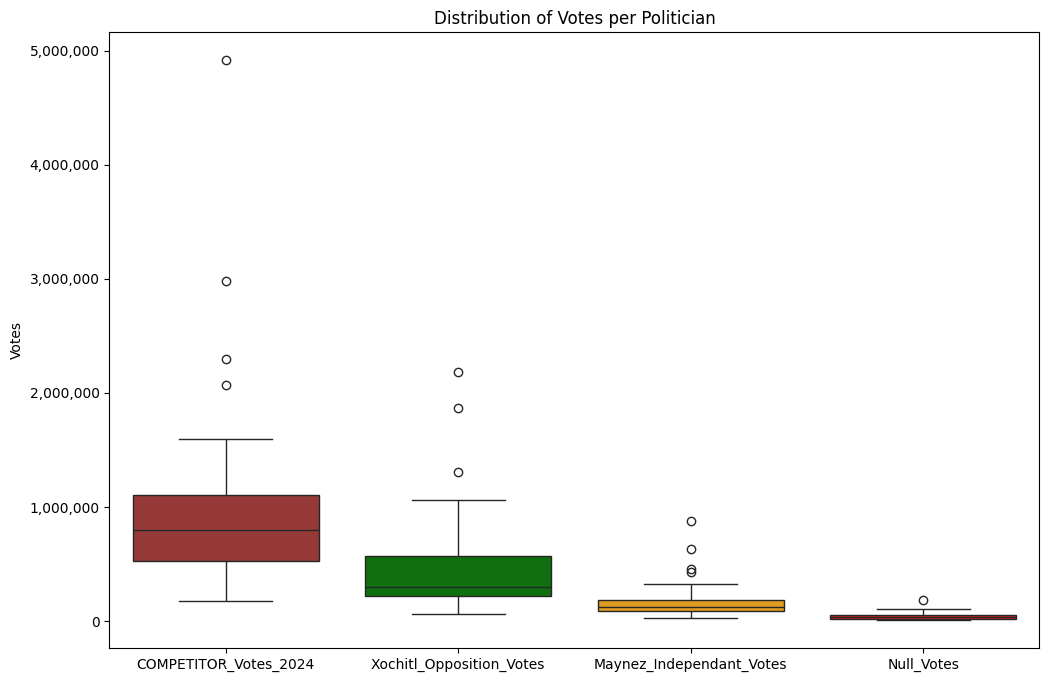

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Transform the DataFrame to long format for seaborn
votes_data_long = pd.melt(df, id_vars=["ENTIDAD"], 
                          value_vars=["COMPETITOR_Votes_2024", "Xochitl_Opposition_Votes", "Maynez_Independant_Votes", "Null_Votes"], 
                          var_name="Politician", 
                          value_name="Votes")

# Define the colors for each politician
palette = {
    "COMPETITOR_Votes_2024": "brown",
    "Xochitl_Opposition_Votes": "green",
    "Maynez_Independant_Votes": "orange",
    "Null_Votes": "red"
}

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x="Politician", y="Votes", data=votes_data_long, palette=palette, hue="Politician", dodge=False)
plt.legend([],[], frameon=False)  # Remove the legend

# Give the plot a useful title
plt.title('Distribution of Votes per Politician')

# Label the y-axis
plt.ylabel('Votes')

# Label the x-axis
plt.xlabel('')

# Format the y-axis numbers to avoid scientific notation
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show the plot
plt.show()


In [220]:
import pandas as pd

# Function to identify outliers using the IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers for each vote column
outliers_claudia = find_outliers(df, "COMPETITOR_Votes_2024")
outliers_xochitl = find_outliers(df, "Xochitl_Opposition_Votes")
outliers_maynez = find_outliers(df, "Maynez_Independant_Votes")
outliers_null = find_outliers(df, "Null_Votes")

# Display the states with outliers for each politician
print("Outliers for Claudia:")
print(outliers_claudia[["ENTIDAD", "COMPETITOR_Votes_2024"]])

print("\nOutliers for Xochitl:")
print(outliers_xochitl[["ENTIDAD", "Xochitl_Opposition_Votes"]])

print("\nOutliers for Maynez:")
print(outliers_maynez[["ENTIDAD", "Maynez_Independant_Votes"]])

print("\nOutliers for Null Votes:")
print(outliers_null[["ENTIDAD", "Null_Votes"]])


Outliers for Claudia:
             ENTIDAD  COMPETITOR_Votes_2024
6   CIUDAD DE MEXICO                2978243
14            MEXICO                4916419
20            PUEBLA                2066399
29          VERACRUZ                2300252

Outliers for Xochitl:
             ENTIDAD  Xochitl_Opposition_Votes
6   CIUDAD DE MEXICO                   1862780
13           JALISCO                   1303587
14            MEXICO                   2177817

Outliers for Maynez:
             ENTIDAD  Maynez_Independant_Votes
6   CIUDAD DE MEXICO                    454084
13           JALISCO                    631761
14            MEXICO                    876926
18        NUEVO LEON                    432115

Outliers for Null Votes:
   ENTIDAD  Null_Votes
14  MEXICO      179058


In the outliers, I don't see any special causes to be eliminated or ignored. But I see that those outliers match with the very populated entities.

## HISTOGRAMS EXPLORATION <a id='Histograms_Exploration'></a>

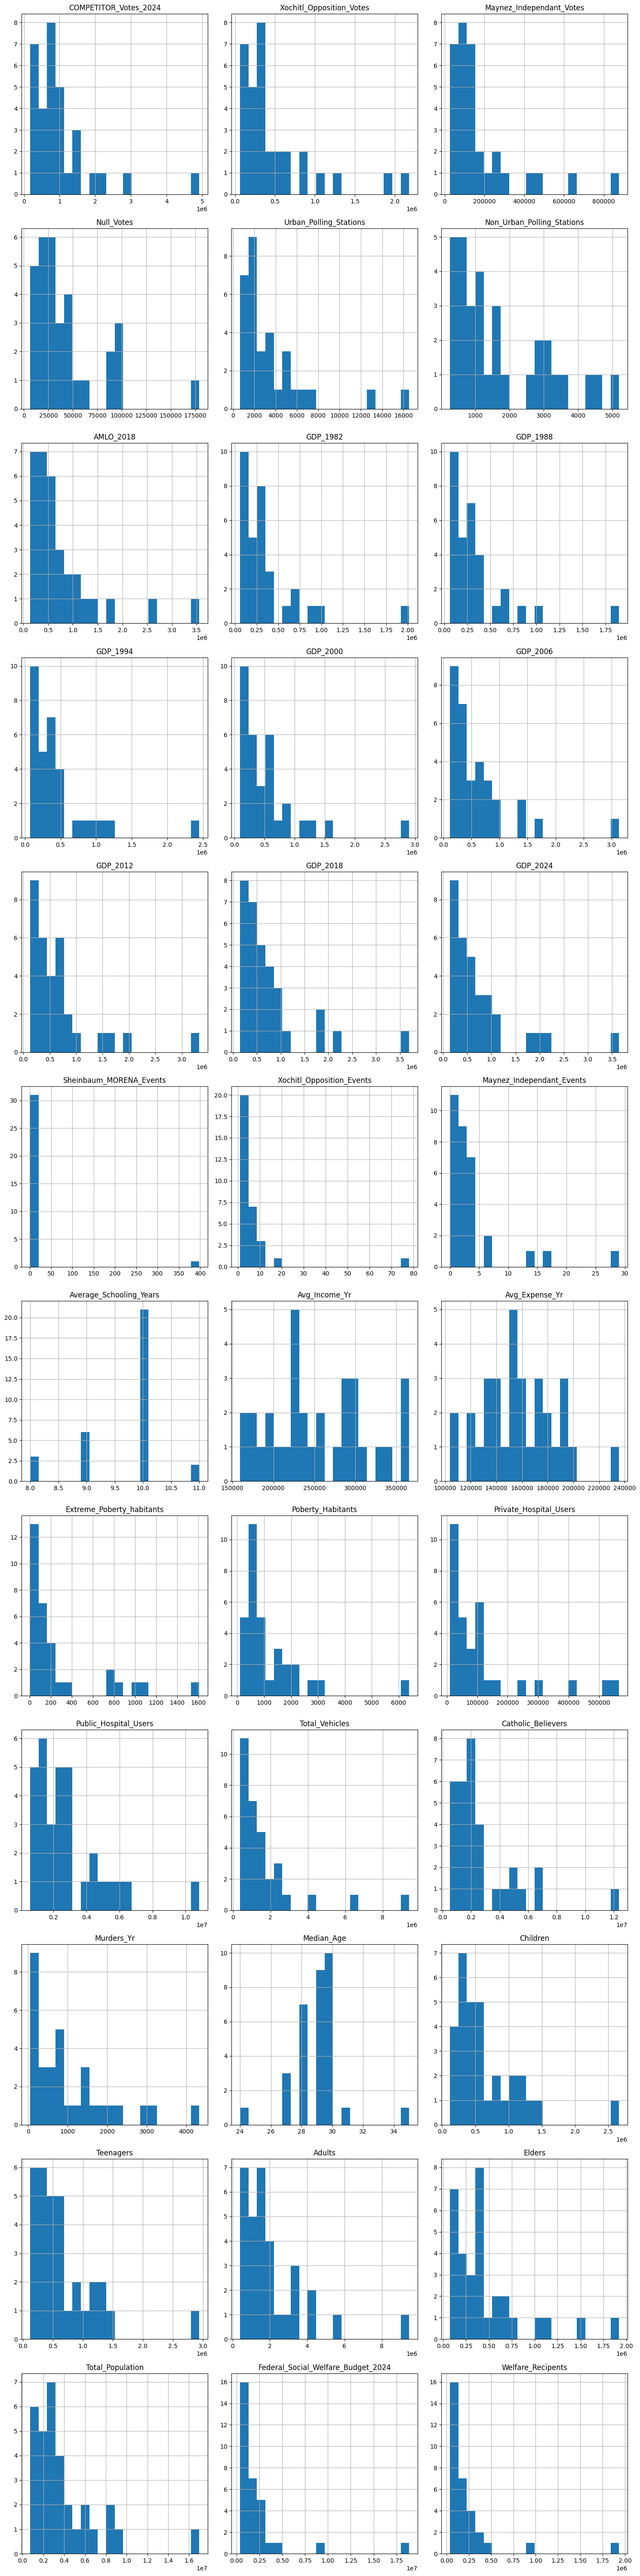

In [221]:

# Adjust the size of the figure and the layout
num_columns = df.select_dtypes(include=['number']).columns
num_plots = len(num_columns)

# Calculate the number of rows and columns for subplots
n_cols = 3
n_rows = (num_plots + n_cols - 1) // n_cols  # This ensures all plots fit

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plot histograms for each numeric feature
for i, col in enumerate(num_columns):
    ax = axes[i]
    df[col].hist(ax=ax, bins=20)
    ax.set_title(col)

# Hide any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Not all the distributions look normal, so I will be carefull during EDA and Modeling

## Multivariate Analysis <a id='Multivariate_Analysis'></a>

HeatMap

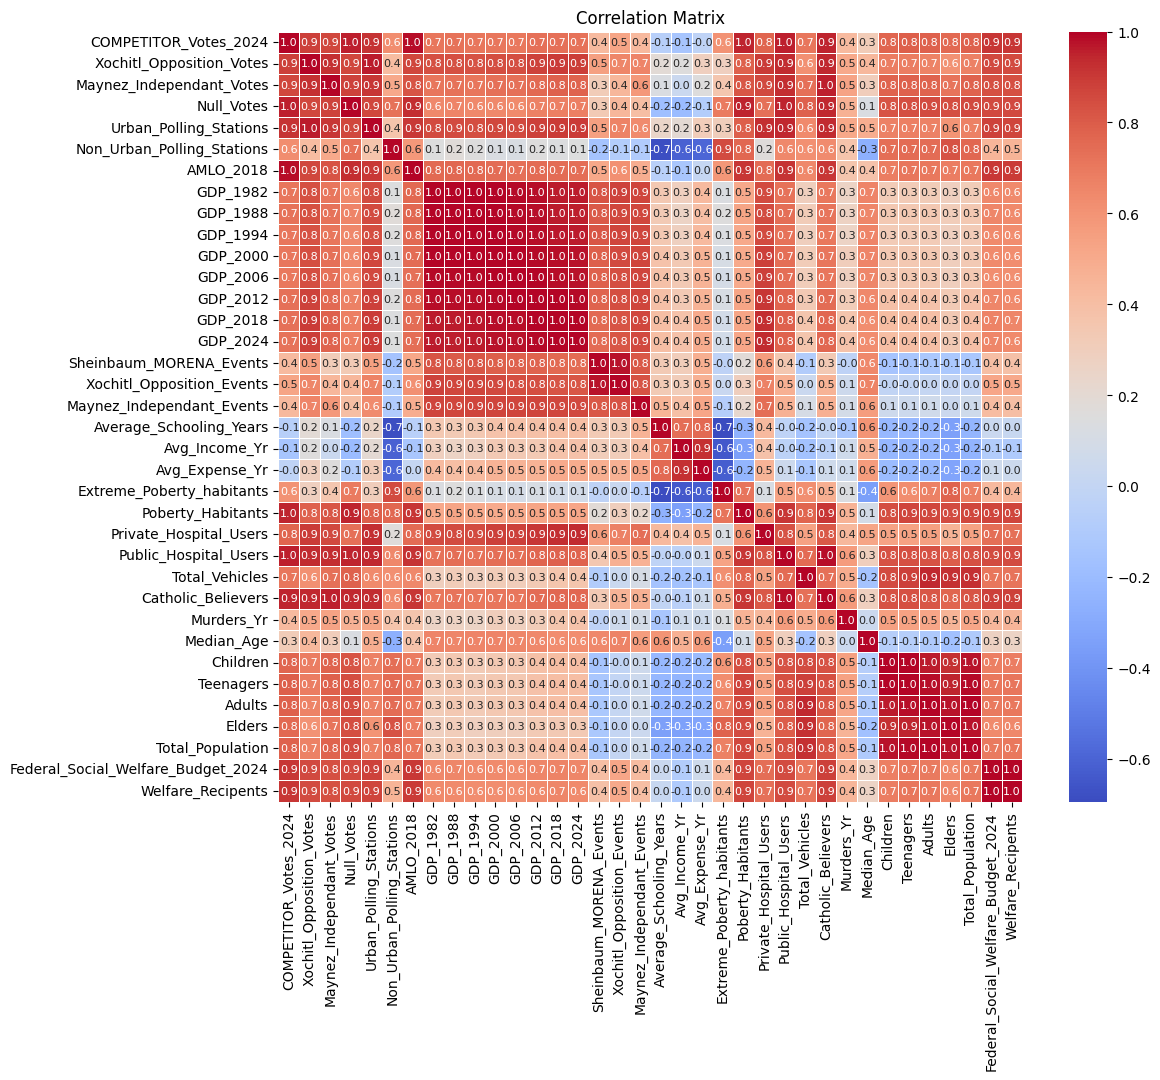

In [222]:
# Exclude the 'ENTIDAD' column for the correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap with smaller text and fewer decimal places
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".1f", annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

Happy to see that many variables seem to be correlated, colineality and other noices will be analyzed deeply during EDA.

## OTHER FINDINGS <a id='Other_Findings'></a>

In the other hand I am curious to see the trend of boxplots from 1982 to 2024, as I noticed a slowdown in 2024. Lets take a look to see if my perception is correct

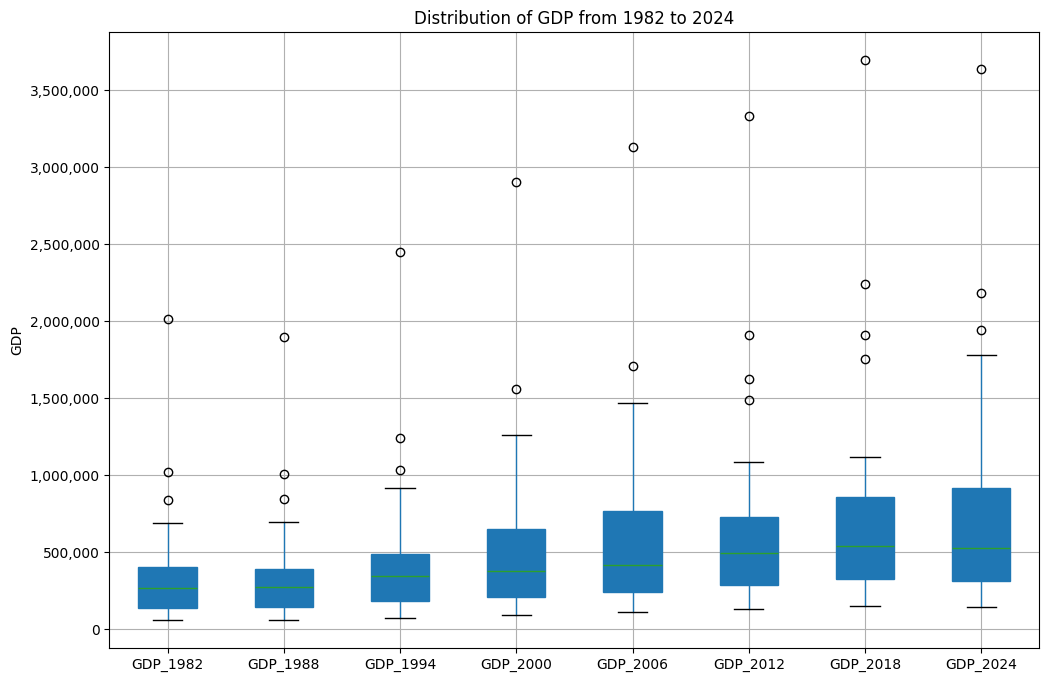

In [223]:
import pandas as pd
import matplotlib.pyplot as plt

GDP= [ "GDP_1982", "GDP_1988", "GDP_1994", "GDP_2000", "GDP_2006","GDP_2012", "GDP_2018", "GDP_2024"]

# Assuming df is already loaded with your data
# Select the GDP columns for the boxplot
gdp_data = df[GDP]

# Create the boxplot
fig, ax = plt.subplots(figsize=(12, 8))
box = gdp_data.boxplot(ax=ax, patch_artist=True)


# Give the plot a useful title
ax.set_title('Distribution of GDP from 1982 to 2024')

# Label the y-axis
ax.set_ylabel('GDP')

# Label the x-axis
ax.set_xticklabels(GDP, rotation=0)

# Format the y-axis numbers to avoid scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show the plot
plt.show()


Its a little bit difficult to see the patterns as those boxplots are based on the variation per state. Lets sum all the states (at a Nation Level) and see the trend per every election Year:


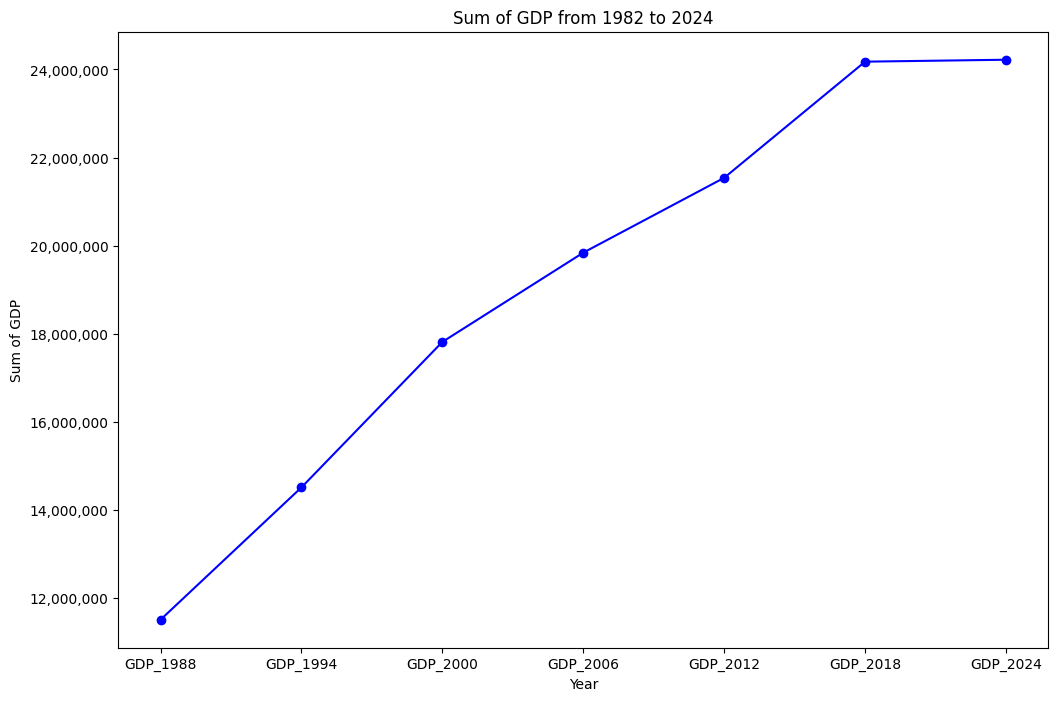

In [224]:
import pandas as pd
import matplotlib.pyplot as plt

GDP = [ "GDP_1988", "GDP_1994", "GDP_2000", "GDP_2006", "GDP_2012", "GDP_2018", "GDP_2024"]

# Assuming df is already loaded with your data
# Select the GDP columns
gdp_data = df[GDP]

# Calculate the sum of GDP for all states per year
gdp_sum = gdp_data.sum()

# Create the line plot
plt.figure(figsize=(12, 8))
plt.plot(gdp_sum.index, gdp_sum.values, marker='o', linestyle='-', color='b')

# Give the plot a useful title
plt.title('Sum of GDP from 1982 to 2024')

# Label the y-axis
plt.ylabel('Sum of GDP')

# Label the x-axis
plt.xlabel('Year')

# Format the y-axis numbers to avoid scientific notation
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show the plot
plt.show()


In the heat map I saw important correlations. I am now curious on how do the Independant Variables move in general compared to my dependant variable "Claudia_COMPETITOR_VOTES". But I also see that it is important to reduce the number of features. Specifically eliminate the other Politicians (Xochitl, Maynez) and reduce the # of GDP Years Trend

In [225]:
eliminate= [ "GDP_1982", "GDP_1988", "GDP_1994", "GDP_2000", "GDP_2006", "GDP_2012", 'Xochitl_Opposition_Votes', 'Maynez_Independant_Votes']
simplified_df= df.drop(columns= eliminate)


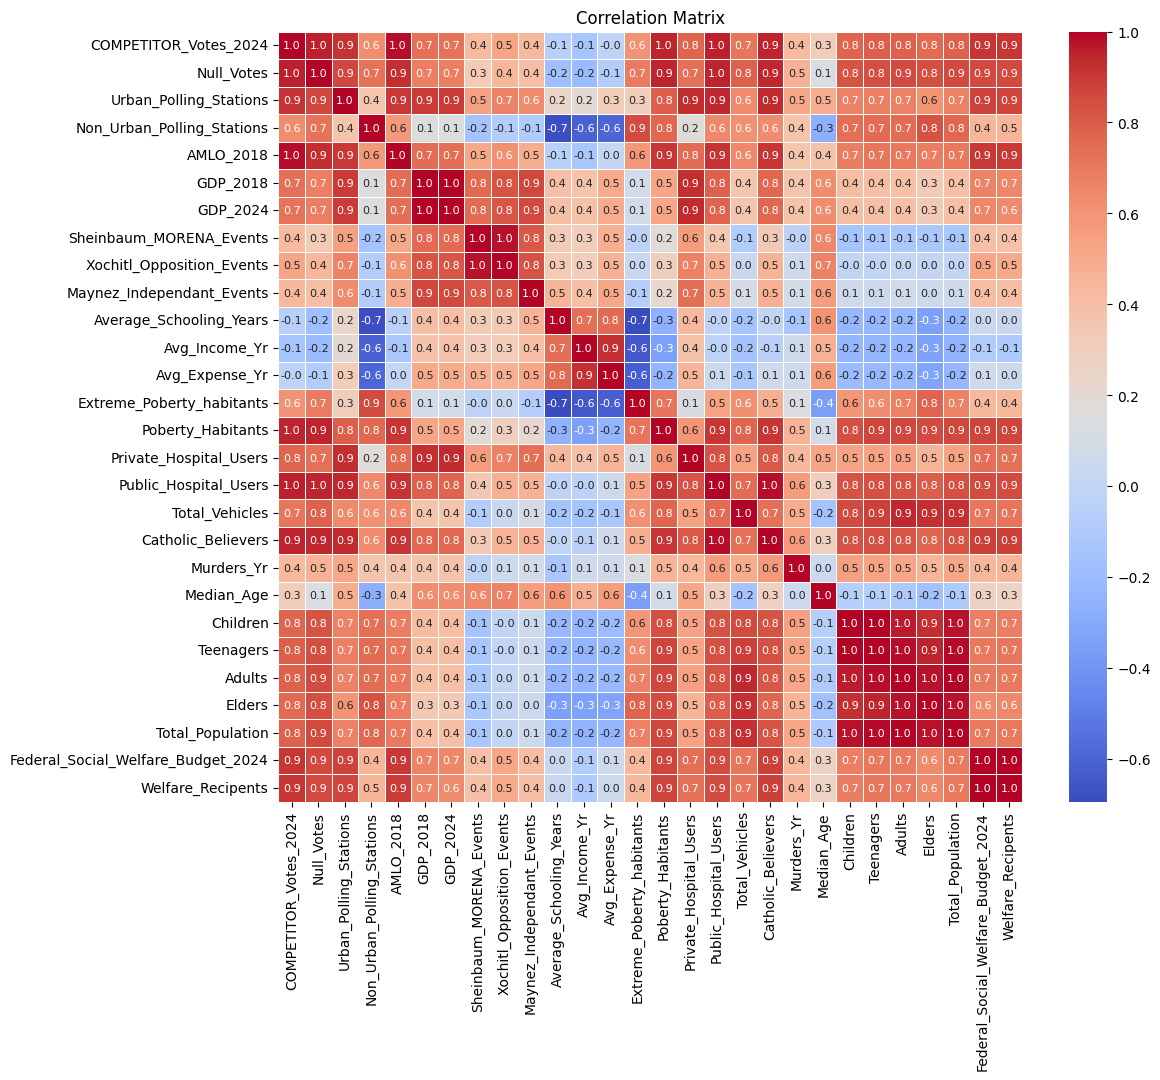

In [226]:
# Exclude the 'ENTIDAD' column for the correlation matrix
numeric_df = simplified_df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap with smaller text and fewer decimal places
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".1f", annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

Scatter Plots

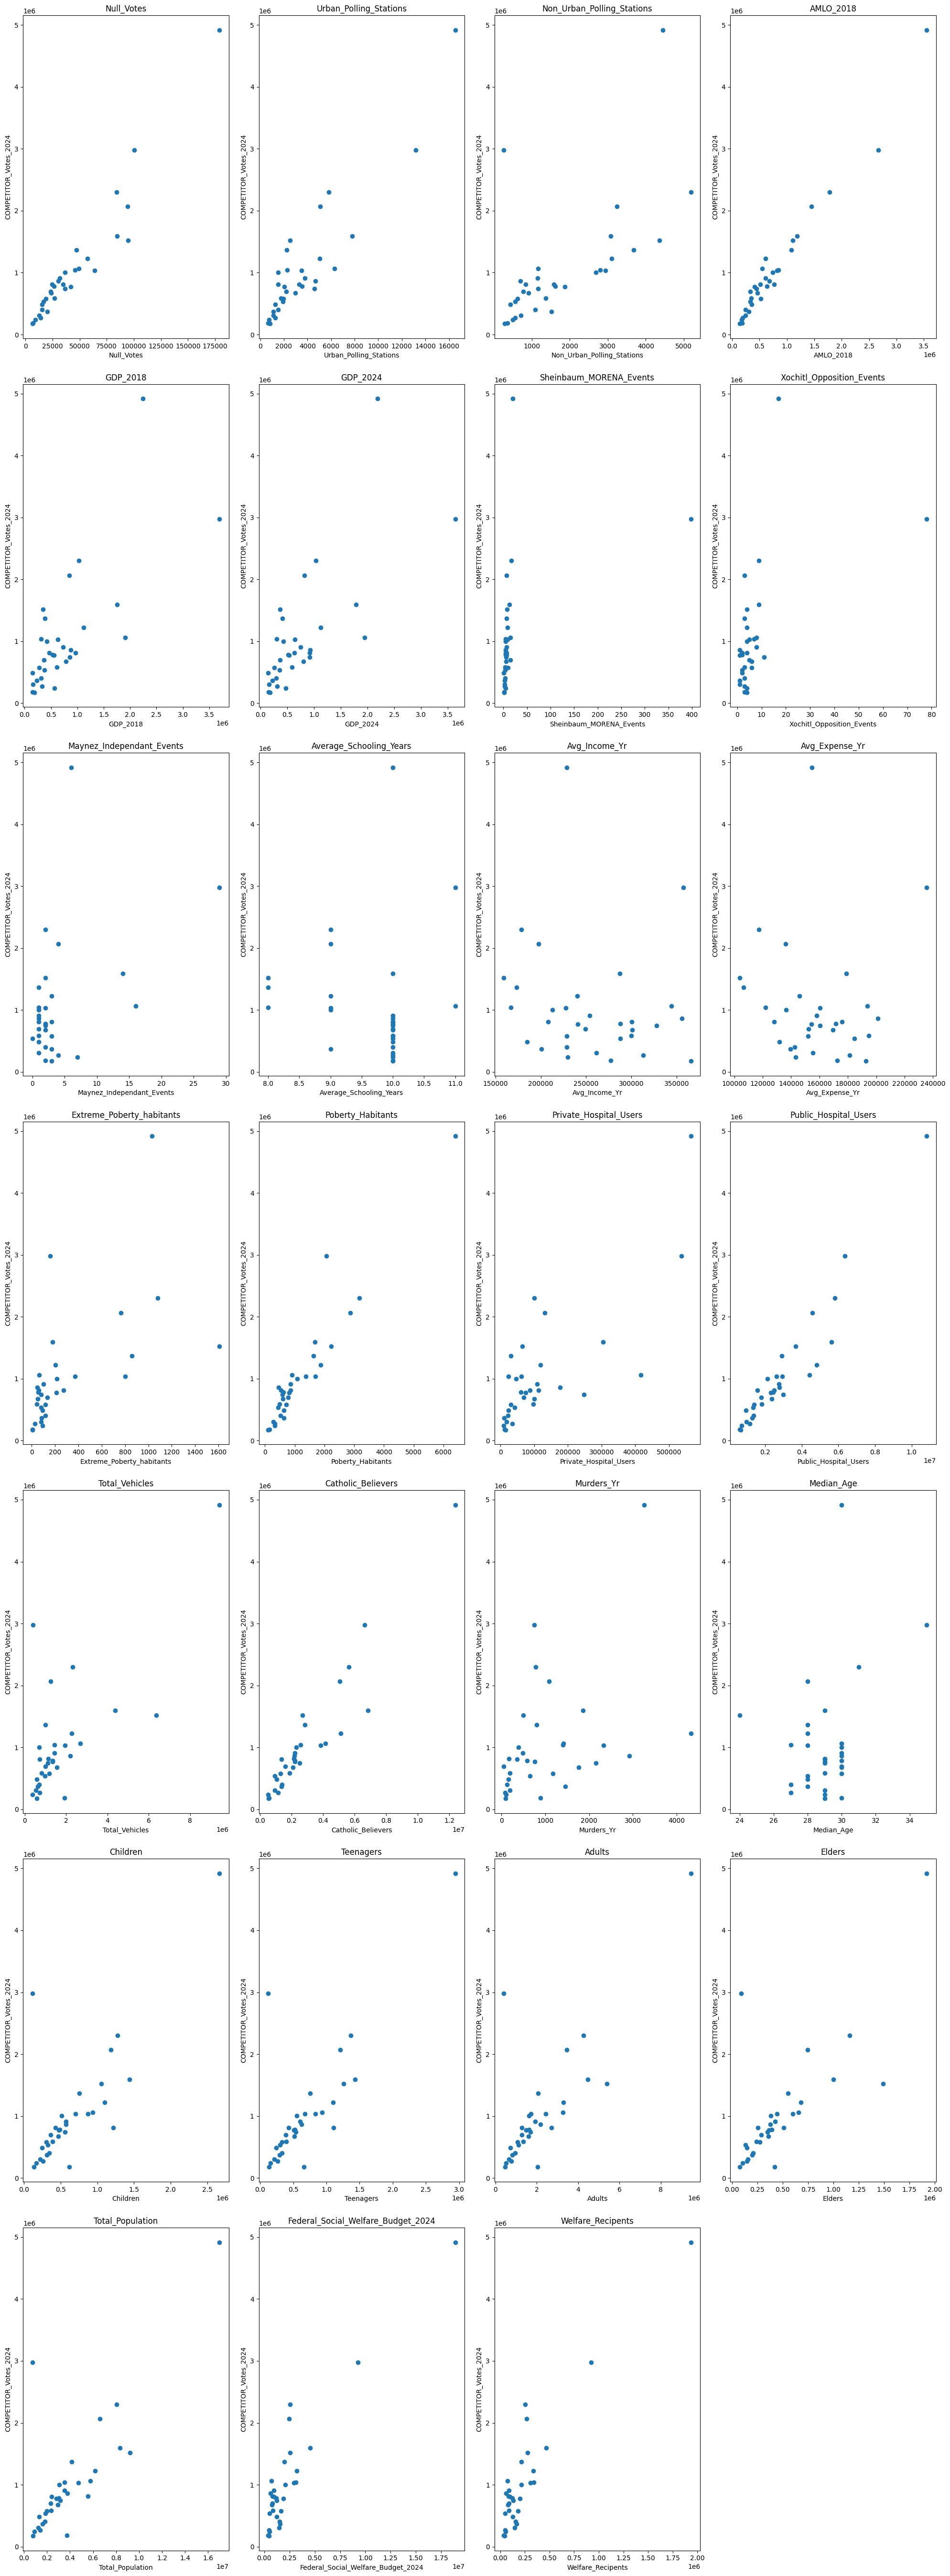

In [227]:
# Select numeric features and exclude 'COMPETITOR_Votes_2024' from the list of independent variables
numeric_df = simplified_df.select_dtypes(include=[float, int]).drop(columns=['COMPETITOR_Votes_2024'])

# Number of independent variables
num_vars = numeric_df.shape[1]

# Create a grid of subplots
fig, axes = plt.subplots(nrows=(num_vars + 3) // 4, ncols=4, figsize=(20, num_vars * 2))
axes = axes.flatten()

# Generate scatter plots for each numeric variable against 'COMPETITOR_Votes_2024'
for i, col in enumerate(numeric_df.columns):
    axes[i].scatter(simplified_df[col], simplified_df['COMPETITOR_Votes_2024'])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('COMPETITOR_Votes_2024')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Now I confirm my hypothesis, there was a real slowdown in 2024. This might be caused by:

1) Government Economic Policies:

A focus on austerity and reduced spending in certain sectors may have slowed economic growth.
Political and Economic Uncertainty:

2) Uncertainty around public policies, investments, and trade relations (e.g., USMCA negotiations) likely affected investor confidence and growth.
Impact of COVID-19 Pandemic:

3) The pandemic caused a severe economic contraction in 2020, with recovery efforts not fully compensating for the initial downturn.
Investment and Industrial Growth:

4) Insufficient investment in infrastructure and key industries may have contributed to the flat GDP growth.

This is an important insight to be presented to the stake holders!!! As this can be part of the "Value proposition" of the Opposition (Economic development)

Meanwhile, For the Modeling or EDA I might eliminate most of the GDP historic data and keep only 2012-2024 to simplify my model

## SUMMARY <a id='SUMMARY'></a>

The data wrangling process laid a solid foundation for further analysis by ensuring that the dataset was clean, transformed, and well-understood. The insights gained from exploratory data analysis and correlation analysis will guide the development of predictive models and deeper analytical studies. This meticulous preparation is essential for deriving meaningful conclusions and actionable insights from the data, ultimately aiding in strategic decision-making and policy formulation.

In the context of the INE PREP Elections analysis project, data engineering played a crucial role in preparing the dataset for thorough analysis. 

In this data wrangling project, we systematically processed and analyzed a dataset consisting of socio-demographic and election-related variables to prepare it for further analysis.The following steps were undertaken to ensure the data was ready for meaningful insights and modeling:

Data Integration
Merging Data Sources: Combined multiple datasets, including socio-demographic data from INEGI and electoral data from the INE PREP database, ensuring alignment based on state identifiers.


Data Cleaning

Handling Missing Values: Addressed missing values using:
Imputation: Filled missing numeric values with median or mean values.
Deletion: Removed rows or columns with extensive missing data that could not be reliably imputed.

Data Type Conversion: Several columns required conversion from object types to numeric types for accurate analysis. We performed these conversions and handled any errors or inconsistencies that arose during the process.

Checking Unique values: Avoid repeted categorical values (Entidad)

Correlation Analysis
Correlation Matrix: A correlation matrix was generated to identify linear relationships between variables. This helped in understanding which features were strongly related to each other and to the target variable, "COMPETITOR_Votes_2024".
Heatmap Visualization: The correlation matrix was visualized using a heatmap, with annotations and adjusted text sizes for clarity. This provided a visual representation of the correlations and helped in identifying significant relationships.

Scatter Plots
Scatter Plot Matrix: Scatter plots were created for each numeric variable against the target variable, "COMPETITOR_Votes_2024". This visual analysis highlighted potential predictors and their influence on the dependent variable. The scatter plots provided insights into the nature of the relationships, whether linear or non-linear, and helped in identifying outliers.